後ほど画像処理をするために、サンプルとなる画像をダウンロードしておく。

In [2]:
import urllib.request
urllib.request.urlretrieve("https://upload.wikimedia.org/wikipedia/commons/3/3f/JPEG_example_flower.jpg", "/tmp/example.jpg")

('/tmp/example.jpg', <http.client.HTTPMessage at 0x105a2faa0>)

opencvと可視化のためにmatplotlibをインストールする

In [3]:
!pip install opencv-python matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

# ファイルからの画像の読み込み

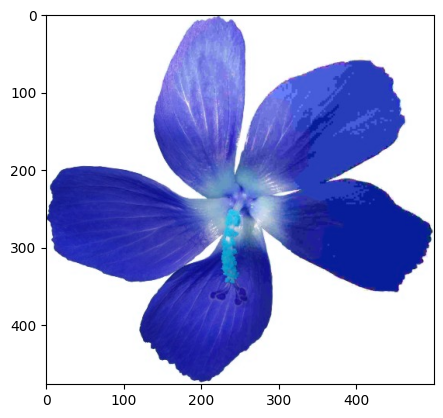

In [5]:
image = cv2.imread('/tmp/example.jpg')
plt.imshow(image)

この元画像は赤い花なので、色がおかしい。色の順番を変換して再度可視化する。

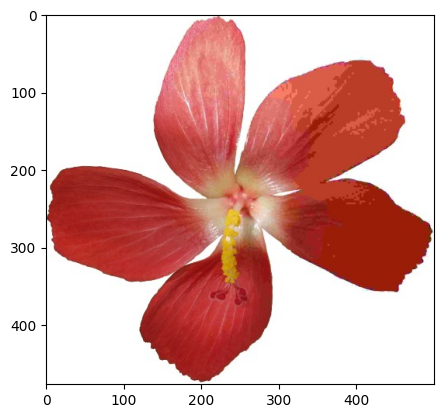

In [6]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

# 画像のサイズ
`.shape`でアクセスすれば、画像のフォーマットが分かる。

In [7]:
image.shape

(477, 500, 3)

`.shape`は高さ、幅、1ピクセルあたりのチャンネル数を示す

In [8]:
h, w = image.shape[:2]
print('height', h, 'width', w)

height 477 width 500


# ピクセル単位のアクセス
配列の要素と思ってアクセスすれば良い

In [9]:
b, g, r = image[10, 10]
print(b, g, r)

255 255 255


配列にアクセスするときの第3要素としてチャンネルを指定すれば直接アクセスも可能

In [10]:
b = image[10, 10, 0]
print(b)

255


ちなみに、この画像は白い部分のピクセルに対応している。

1チャンネルのみ抜き出す

In [11]:
b = image[:, :, 0]
b

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(477, 500), dtype=uint8)

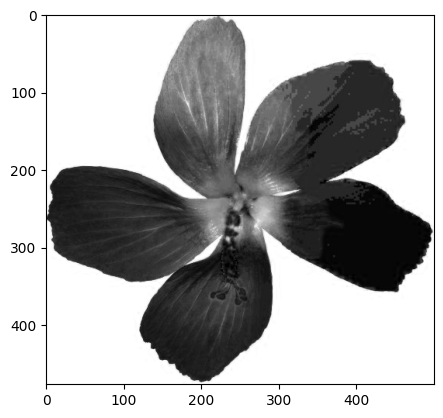

In [13]:
plt.imshow(b, cmap='gray')

ROIを切り出してみる.
ためしに、(100, 100)から(240, 240)を切り出してみる

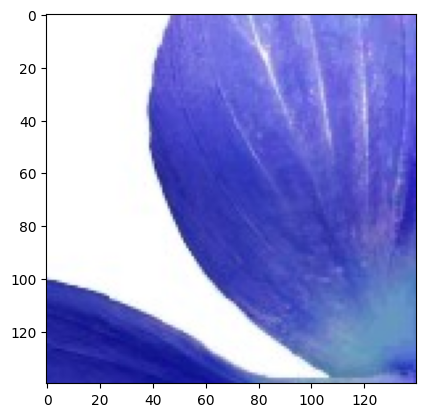

In [14]:
small_image = image[100:240, 100:240]
plt.imshow(small_image)